#**Linear Regression LAB Session 2**

We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Load and review data

In [ ]:
cData= pd.read_csv('/content/auto-mpg.csv')

In [ ]:
cData.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [ ]:
# 8 variables: 
#
# MPG (miles per gallon), 
# cylinders, 
# engine displacement (cu. inches), 
# horsepower,
# vehicle weight (lbs.), 
# time to accelerate from O to 60 mph (sec.),
# model year (modulo 100), and 
# origin of car (1. American, 2. European,3. Japanese).
#
# Also provided are the car labels (types) 
# Missing data values are marked by series of question marks.

In [ ]:
cData.shape

(398, 9)

## Create Dummy Variables
Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that european cars fall exactly half way between american and asian cars! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this car America?", "Is this care European?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions.




In [ ]:
cData['origin'] = cData['origin'].replace({1:'america',2:'europe',3:'asia'})

In [ ]:
cData.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,america,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,america,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,america,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,america,chevy s-10


In [ ]:
cData=cData.drop('car name',axis=1)

In [ ]:
cData

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,america
394,44.0,4,97.0,52,2130,24.6,82,europe
395,32.0,4,135.0,84,2295,11.6,82,america
396,28.0,4,120.0,79,2625,18.6,82,america


## Dealing with Missing Values

In [ ]:
cData.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
cData.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [ ]:
hpIsDigit=pd.DataFrame(cData.horsepower.str.isdigit())

In [ ]:
cData[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [ ]:
cData=cData.replace('?',np.nan)
cData[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


In [ ]:
cData.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
cData.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
dtype: float64

In [ ]:
cData['horsepower']=cData['horsepower'].fillna(cData['horsepower'].median())

In [ ]:
cData.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
cData[hpIsDigit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,93.5,2046,19.0,71,america
126,21.0,6,200.0,93.5,2875,17.0,74,america
330,40.9,4,85.0,93.5,1835,17.3,80,europe
336,23.6,4,140.0,93.5,2905,14.3,80,america
354,34.5,4,100.0,93.5,2320,15.8,81,europe
374,23.0,4,151.0,93.5,3035,20.5,82,america


In [ ]:
cData.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [ ]:
cData['horsepower']=cData['horsepower'].astype('float64')

In [ ]:
cData.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

### Create Dummy Variables contn

In [ ]:
cData = pd.get_dummies(cData,['origin'])

In [ ]:
cData

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

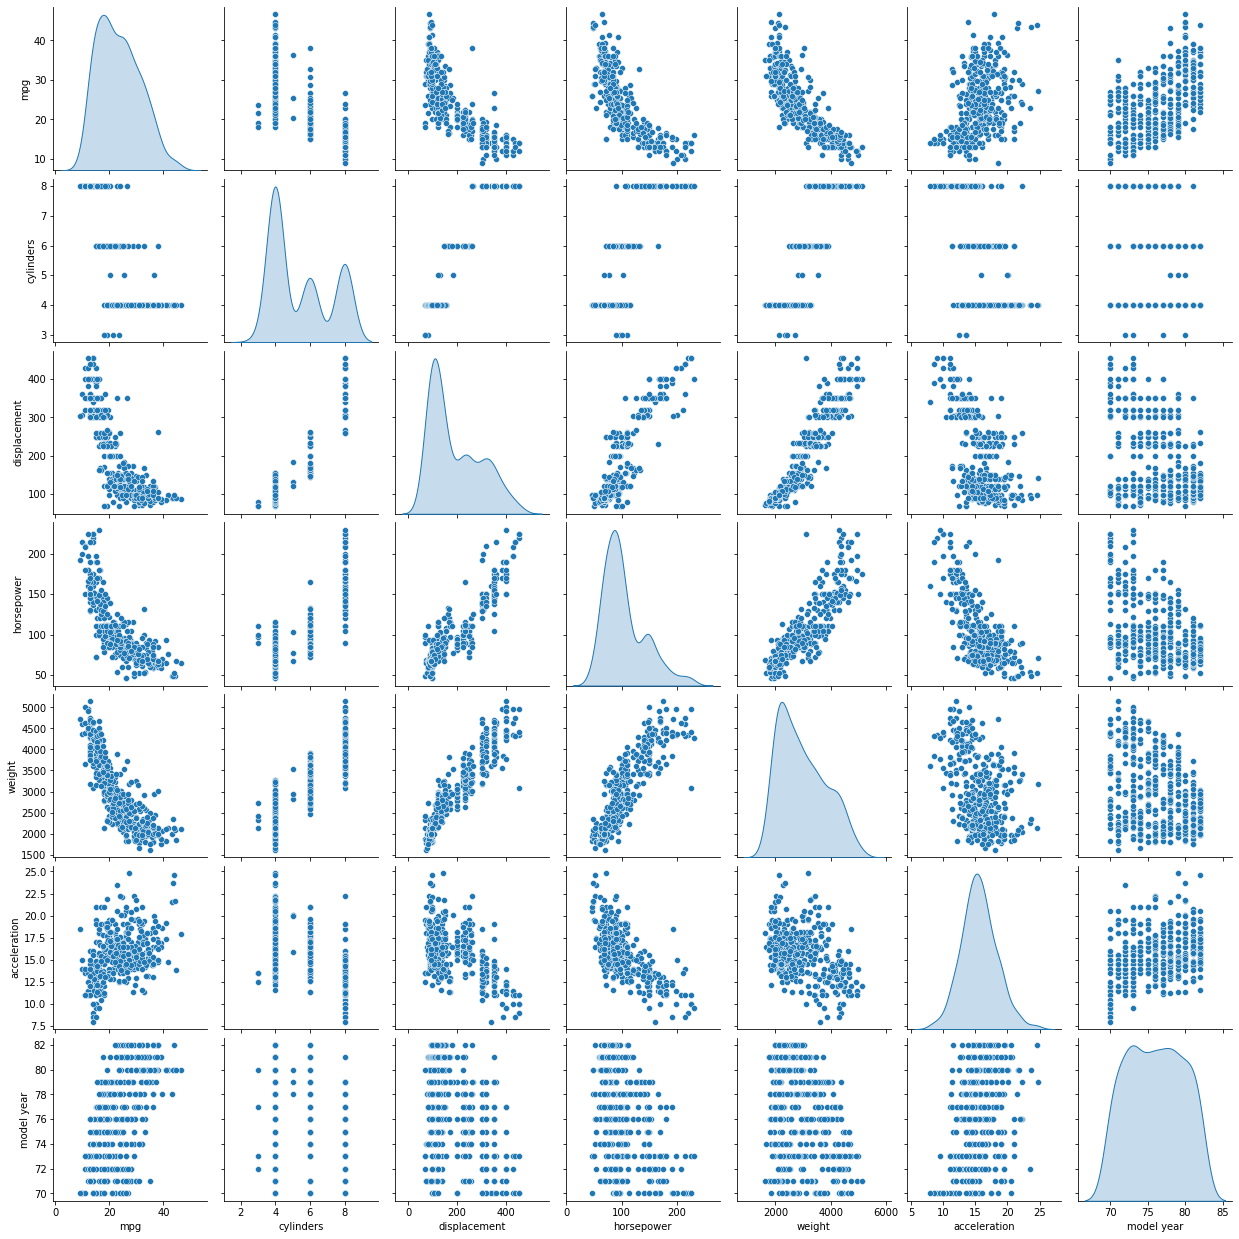

In [ ]:
cData_attr=cData.iloc[:,0:7]
sns.pairplot(cData_attr,diag_kind='kde')

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


## Split Data

In [ ]:
cData

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [ ]:
y=cData['mpg']
X=cData.drop('mpg',axis=1)

In [ ]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0,0
394,4,97.0,52.0,2130,24.6,82,0,0,1
395,4,135.0,84.0,2295,11.6,82,1,0,0
396,4,120.0,79.0,2625,18.6,82,1,0,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

## Fit Linear Model

In [ ]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

Here are the coefficients for each variable and the intercept

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cylinders is -0.39480796616483205
The coefficient for displacement is 0.028945510765487483
The coefficient for horsepower is -0.02175220772354737
The coefficient for weight is -0.007352032065147358
The coefficient for acceleration is 0.06191936600761753
The coefficient for model year is 0.8369338917645016
The coefficient for origin_america is -1.798849345837429
The coefficient for origin_asia is 0.5964156907563457
The coefficient for origin_europe is 1.2024336550810832


In [ ]:
regression_model.intercept_

-19.485884771453247

mpg = -0.39 cylinders + 0.028displacement - 0.02horsepower -0.007weight + ... + 1.20origin_europe

The score (R^2) for in-sample and out of sample

In [ ]:
regression_model.predict(X_test)

array([20.91554528, 27.78619415, 20.35450492, 26.7530043 , 24.34440311,
       15.94627895, 29.61711144, 34.54999717, 17.08487642, 10.56570744,
       30.27190054, 16.46101954, 22.34949158, 27.36817515, 36.4916326 ,
       23.52414572, 10.95688403, 20.15994355,  9.06847316, 33.03329847,
       25.97760019, 32.32715763, 20.84295791, 25.08512814, 25.67024575,
       30.00444827, 32.58061387, 32.5462297 , 15.1314045 , 30.17173763,
       27.18513498, 11.04447745, 21.28330056, 28.68243423, 24.88266353,
       13.63888896, 26.37838591,  9.21013918, 31.6904227 , 23.85386165,
       23.89949396, 24.41984635, 21.05348912, 34.13688229, 25.91853825,
       22.15815042, 21.15554401, 11.6783042 , 28.50708814, 19.00196555,
       24.24819425, 26.62821232, 17.07117894, 12.10403757, 28.34022188,
       24.82823055, 10.32835574, 13.09624022, 30.49807412, 35.81856922,
       36.58585421, 35.86191278, 17.92313015, 27.49879047, 20.67007774,
       33.42297856, 26.59143064, 26.57457423, 29.67371196, 12.34

In [ ]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
174,6,171.0,97.0,2984,14.5,75,1,0,0
359,4,141.0,80.0,3230,20.4,81,0,0,1
250,8,318.0,140.0,3735,13.2,78,1,0,0
274,5,131.0,103.0,2830,15.9,78,0,0,1
283,6,232.0,90.0,3265,18.2,79,1,0,0
...,...,...,...,...,...,...,...,...,...
382,4,108.0,70.0,2245,16.9,82,0,1,0
39,8,400.0,175.0,4464,11.5,71,1,0,0
171,4,134.0,96.0,2702,13.5,75,0,1,0
271,4,156.0,105.0,2745,16.7,78,1,0,0


In [ ]:
regression_model.predict(np.array([6,171,97,2984,14.5,75,1,0,0]).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([20.91554528])

In [ ]:
regression_model.score(X_test,y_test)*100

84.33135132808826

In [ ]:
from sklearn import metrics

prediction = regression_model.predict(X_test)

metrics.mean_absolute_error(y_test,prediction)

2.3542812072204033

In [ ]:
MAE = metrics.mean_absolute_error(y_test,prediction)
RMSE = np.sqrt(MAE)
RMSE

1.5343667121064648